In [1]:
import numpy as np
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)    

Want to constrain mobility in soils by outlet fit. 

Does the **variable model** allow us to see the constraint effects (on Kd and DT50), when constrained by the outlet? 

In [6]:
df1 = get_data(gen="Gen7")


In [7]:
df1["Gen"] = "Gen7"
# # df3["Gen"] = "Gen3"
# df4["Gen"] = "Gen6"
df = pd.concat([df1, 
#                 df3, 
#                 df4
               ])



In [8]:
print(len(df1), 
#       len(df4)
     )

(850,)


In [9]:
# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [10]:
# 'LHS_e1var7/1/' in df.index

In [11]:
df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
# Combined outlet and transects KGE Concentrations and d13C
df['KGE-SM'] = (df.loc[:, 'KGE-CONC_out'] + df.loc[:, 'KGE-CONC-blk'])/2.0  
df['KGE-d13C'] = (df.loc[:, 'KGE-d13C_out'] + df.loc[:, 'KGE-d13C-blk'])/2.0

isocst = 0.5
df['Constraint'] = df.apply(IsoKGE, args=(isocst,), axis=1)

In [12]:
print("Maximum Conc.")
print(df['KGE-CONC-tra'].max(), df['KGE-CONC_out'].max(), df['KGE-SM'].max()) 
print("Maximum d13C")
print(df['KGE-d13C-tra'].max(), df['KGE-d13C_out'].max(), df['KGE-d13C'].max()) 

Maximum Conc.
(0.8063226246927644, 0.37453357263942555, 0.5654617155535002)
Maximum d13C
(0.8752158501621887, 0.5929149482964915, 0.7370023556433135)


In [13]:
dfs = df[['Model', 'Gen',
          'K_d', 'dt_50_ref', 'k_oc', 'f_oc',
          'KGE-CONC-tra' , 'KGE-CONC-blk',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-LDS_out',
          'KGE-d13C-tra', 'KGE-d13C_out',
          'KGE-SM', 'KGE-d13C', 'Constraint'
         ]]

In [14]:
dfs.tail()

,Model,Gen,K_d,dt_50_ref,k_oc,f_oc,KGE-CONC-tra,KGE-CONC-blk,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
Name,,,,,,,,,,,,,,,,
Gen7/LHS_sc1var47/50/,var,Gen7,30.278067,49.412918,1070.600224,0.028281,0.175960,0.082531,0.721556,-0.191982,0.654949,0.865052,0.465737,-0.054725,0.668159,KGE-d13C > 0.5
Gen7/LHS_sc1var47/6/,var,Gen7,57.095460,33.574550,1742.033794,0.032775,0.779878,0.728830,0.604955,-0.506958,-0.352323,0.762059,0.108786,0.110936,0.345414,KGE-d13C < 0.5
Gen7/LHS_sc1var47/7/,var,Gen7,32.765266,39.290694,1235.300502,0.026524,0.746132,0.685426,0.670298,-0.013950,0.220700,0.681366,0.190405,0.335738,0.526602,KGE-d13C > 0.5
Gen7/LHS_sc1var47/8/,var,Gen7,30.932891,30.714116,1512.066834,0.020457,0.257760,0.248163,0.678236,-0.490923,-0.216745,0.839079,0.468220,-0.121380,0.639794,KGE-d13C > 0.5
Gen7/LHS_sc1var47/9/,var,Gen7,5.922168,28.227290,242.494675,0.024422,0.572513,0.693077,0.508450,-2.164371,-13.522247,0.666766,0.085973,-0.735647,0.242668,KGE-d13C < 0.5


Filter for good concentrations

In [15]:
# Filter
ff = dfs.loc[(dfs['KGE-SM'] > 0.46)] # Try 25 with more data points
ff_c = ff.loc[(ff['KGE-d13C'] > 0.46)]
print(len(dfs), len(ff), len(ff_c))

aveKGEs_var = float(ff.loc[ff['Model']=='var']['KGE-CONC-tra'].mean())
aveKGEo_var = float(ff.loc[ff['Model']=='var']['KGE-CONC_out'].mean())

aveKGEs_fix = float(ff.loc[ff['Model']=='fix']['KGE-CONC-tra'].mean())
aveKGEo_fix = float(ff.loc[ff['Model']=='fix']['KGE-CONC_out'].mean())

aveKGEs_var_c = float(ff_c.loc[ff_c['Model']=='var']['KGE-CONC-tra'].mean())
aveKGEo_var_c = float(ff_c.loc[ff_c['Model']=='var']['KGE-CONC_out'].mean())

aveKGEs_fix_c = float(ff_c.loc[ff_c['Model']=='fix']['KGE-CONC-tra'].mean())
aveKGEo_fix_c = float(ff_c.loc[ff_c['Model']=='fix']['KGE-CONC_out'].mean())

# fix_num = len(dfs.loc[dfs['Model']== 'fix'])
# var_num = len(dfs.loc[dfs['Model']== 'var'])

# fix_passed = len(ff.loc[ff['Model']== 'fix'])
# var_passed = len(ff.loc[ff['Model']== 'var'])

# f_fix = round(float(fix_passed)/fix_num, 3)
# f_var = round(float(var_passed)/var_num, 3)
# print(fix_num, var_num)
# print(f_fix, f_var)
# print(f_fix*fix_num, f_var*var_num)
print("NC")
print(aveKGEs_var, aveKGEo_var)
print(aveKGEs_fix, aveKGEo_fix)
print("WC")
print(aveKGEs_var_c, aveKGEo_var_c)
print(aveKGEs_fix_c, aveKGEo_fix_c)

(850, 32, 6)
NC
(0.7030758312891454, 0.31728158513185817)
(0.7682038021271147, 0.26406485374839855)
WC
(0.7225416541388187, 0.356020694385776)
(0.743090555560134, 0.3066400071179104)


In [16]:
print("Maximum Conc.")
print(ff['KGE-CONC-tra'].max(), ff['KGE-CONC_out'].max(), ff['KGE-SM'].max()) 
print("Maximum d13C")
print(ff['KGE-d13C-tra'].max(), ff['KGE-d13C_out'].max(), ff['KGE-d13C'].max()) 

Maximum Conc.
(0.8052064626846263, 0.3635415179180387, 0.5654617155535002)
Maximum d13C
(0.855971051349809, 0.3255320255969969, 0.595059062504598)


Set color bar and axes ranges 

In [17]:
vmin, vmax = ff['KGE-SM'].min()* .9, ff['KGE-SM'].max() * 1.05
cmap = sns.diverging_palette(10, 240, l=65, center="light", as_cmap=True)
# cmap = sns.diverging_palette(275, 150, s=80, l=55, center="dark", as_cmap=True)

xmin, xmax = ff['KGE-CONC_out'].min() * 1.3, ff['KGE-CONC_out'].max() * 1.05
ymin, ymax = ff['KGE-CONC-tra'].min() * .9, ff['KGE-CONC-tra'].max() * 1.05

In [18]:
# ff.tail()
# pal = sns.color_palette("Set1", n_colors=8, desat=.5)
pal = dict(Lunch="seagreen", Dinner="gray")
kws = dict(s=50, linewidth=.5, edgecolor="w")

In [19]:
# aveG1 = int(ff.loc[ff['Gen']=='Gen1']['dt_50_ref'].mean())
# aveG4 = int(ff.loc[ff['Gen']=='Gen6']['dt_50_ref'].mean())

# aveG1c = int(ff_c.loc[ff_c['Gen']=='Gen1']['dt_50_ref'].mean())
# aveG4c = int(ff_c.loc[ff_c['Gen']=='Gen6']['dt_50_ref'].mean())

# ff['DT50'] = np.where(ff['Gen'] == "Gen1", aveG1, aveG4)
# ff_c['DT50'] = np.where(ff_c['Gen'] == "Gen1", aveG1c, aveG4c)
# aveG3 = ff.loc[ff['Gen']=='Gen3']['dt_50_ref'].mean()

In [20]:
# aveG1 = int(ff_c.loc[ff_c['Gen']=='Gen1']['dt_50_ref'].mean())
# aveG4 = int(ff_c.loc[ff_c['Gen']=='Gen4']['dt_50_ref'].mean())

# ff_c['DT50'] = np.where(ff_c['Gen'] == "Gen1", aveG1, aveG4)

In [21]:
ff_c.head(2)

,Model,Gen,K_d,dt_50_ref,k_oc,f_oc,KGE-CONC-tra,KGE-CONC-blk,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
Name,,,,,,,,,,,,,,,,
Gen7/LHS_e1fix44/9/,fix,Gen7,21.390959,27.768633,648.653666,0.032977,0.734479,0.694369,0.721171,0.344202,-2.183823,0.59873,0.311114,0.519285,0.595059,KGE-d13C > 0.5
Gen7/LHS_m1fix44/10/,fix,Gen7,3.666272,28.786702,133.152934,0.027534,0.798866,0.777995,0.567804,0.240539,-0.921081,0.52713,0.111547,0.509267,0.488425,KGE-d13C < 0.5


Text(51,191,'A')

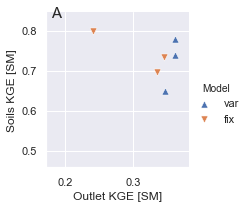

In [22]:
g = sns.FacetGrid(ff_c, hue="Model", hue_kws=dict(marker=["^", "v"]), hue_order=["var", "fix"])
                  #palette=pal, #,                   

g = (g.map(plt.scatter, "KGE-CONC_out", "KGE-CONC-tra", **kws).add_legend())

g.axes[0,0].set_ylim(ymin, ymax)
g.axes[0,0].set_xlim(xmin, xmax) # left plot

# g.axes[0,1].set_ylim(ymin, ymax)
# g.axes[0,1].set_xlim(xmin, xmax) # right plot

ax0 = g.axes[0, 0]
# ax1 = g.axes[0, 1]

ax0.set_xlabel("Outlet KGE [SM]")
ax0.set_ylabel("Soils KGE [SM]")

# ax1.set_xlabel("Outlet KGE [SM]")


ax0.annotate('A', fontsize=15,
            xy=(51, 191), xycoords='figure pixels')
# ax1.annotate('B', fontsize=15,
#             xy=(248, 191), xycoords='figure pixels')

# g.savefig("Fig3_MvsM.pdf")

In [23]:
g = sns.FacetGrid(ff_c, col="DT50", hue="Model", hue_kws=dict(marker=["^", "v"]), hue_order=["var", "fix"])
                  #palette=pal, #,                   

g = (g.map(plt.scatter, "KGE-d13C_out", "KGE-d13C-tra", **kws).add_legend())

g.axes[0,0].set_ylim(ymin, ymax)
g.axes[0,1].set_ylim(ymin, ymax)
g.axes[0,0].set_xlim(xmin, xmax) # left plot
g.axes[0,1].set_xlim(xmin, xmax) # right plot

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

ax0.set_xlabel("Outlet KGE [d13C]")
ax1.set_xlabel("Outlet KGE [d13C]")
ax0.set_ylabel("Soils KGE [d13C]")


ax0.annotate('A', fontsize=15,
            xy=(51, 191), xycoords='figure pixels')
ax1.annotate('B', fontsize=15,
            xy=(248, 191), xycoords='figure pixels')

KeyError: 'DT50'

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.FacetGrid(ff, col='Gen',  hue="Model", hue_kws=dict(marker=["o", "v"]), palette='viridis')
g = g.map(facet_scatter, 'KGE-CONC_out', 'KGE-CONC-tra', "KGE-SM",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap) #.add_legend()

g.axes[0,0].set_ylim(ymin, ymax)
g.axes[0,1].set_ylim(ymin, ymax)
g.axes[0,0].set_xlim(xmin, xmax) # left plot
g.axes[0,1].set_xlim(xmin, xmax) # right plot

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

# ax0.annotate('n = ' + str(fix_num),
#             xy=(0, 0.4), xycoords='data',
#             xytext=(0, 0), textcoords='offset points')

# ax0.annotate('$f_{KGE > 0.3}$ = ' + str(f_fix),
#             xy=(-.05, 0.35), xycoords='data',
#             xytext=(0, 0), textcoords='offset points')

# ax0.set_xlabel("Outlet KGE [SM]")
# ax0.set_ylabel("Soils KGE [SM]")

# ax0.set_title("Static DT50 (Fix)")
# ax1.set_title("Dynamic DT50 (Var)")

ax0.annotate('A', fontsize=15,
            xy=(50, 190), xycoords='figure pixels')
ax1.annotate('B', fontsize=15,
            xy=(235, 190), xycoords='figure pixels')

ax1.annotate('$\overline{KGE}$', fontsize=10,
            xy=(400, 185), xycoords='figure pixels')

# ax1.annotate('n = ' + str(var_num),
#             xy=(0, 0.4), xycoords='data',
#             xytext=(0, 0), textcoords='offset points')

# ax1.annotate('$f_{KGE > 0.3}$ = ' + str(f_var),
#             xy=(-.05, 0.35), xycoords='data',
#             xytext=(0, 0), textcoords='offset points')

# ax1.set_xlabel("Outlet KGE [SM]")


# Draw the colorbar
g.fig.colorbar(points, cax=cax)
# g.savefig("Fig3_MvsM.pdf")

# https://matplotlib.org/examples/pylab_examples/annotation_demo2.html

In [ ]:
vmin, vmax = ff_c['KGE-d13C'].min(), ff_c['KGE-d13C'].max()
cmap = sns.diverging_palette(10, 240, l=65, center="light", as_cmap=True)
# cmap = sns.diverging_palette(275, 150, s=80, l=55, center="dark", as_cmap=True)

xmin, xmax = ff_c['KGE-d13C_out'].min() * .90, ff_c['KGE-d13C_out'].max() * 1.05
ymin, ymax = ff_c['KGE-d13C-tra'].min() * 0.90, ff_c['KGE-d13C-tra'].max() * 1.05

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.FacetGrid(ff_c, col='Model', palette='viridis')
g = g.map(facet_scatter, 'KGE-d13C_out', 'KGE-d13C-tra', "KGE-d13C",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap) #.add_legend()

# g.axes[0,0].set_ylim(ymin, ymax)
# g.axes[0,1].set_ylim(ymin, ymax)
# g.axes[0,0].set_xlim(xmin, xmax) # left plot
# g.axes[0,1].set_xlim(xmin, xmax) # right plot

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

ax0.annotate('n = ' + str(fix_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.annotate('$f_{KGE > 0.3}$ = ' + str(f_fix),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.set_xlabel("Outlet $\delta ^{13}$C [SM]")
ax0.set_ylabel("Soils $\delta ^{13}$C [SM]")

ax0.set_title("Static DT50 (Fix)")
ax1.set_title("Dynamic DT50 (Var)")

ax0.annotate('A', fontsize=15,
            xy=(50, 200), xycoords='figure pixels')
ax1.annotate('B', fontsize=15,
            xy=(235, 200), xycoords='figure pixels')

ax1.annotate('$\overline{KGE}$', fontsize=10,
            xy=(410, 200), xycoords='figure pixels')

ax1.annotate('n = ' + str(var_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.annotate('$f_{KGE > 0.3}$ = ' + str(f_var),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.set_xlabel("Outlet $\delta ^{13}$C [SM]")

# ax1.annotate('No equifinality \nat low DT50', 
#             xy=(15, 70), xycoords='data',
#             xytext=(-20, 20), textcoords='offset points',
#             arrowprops=dict(arrowstyle="->", color='grey'))

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

## Using Joint Plot

In [ ]:
ff.head(2)

In [ ]:
xmin, xmax = ff['KGE-CONC_out'].min() * .90, ff['KGE-CONC_out'].max() * 1.05
ymin, ymax = ff['KGE-CONC-tra'].min() * 0.90, ff['KGE-CONC-tra'].max() * 1.05

In [ ]:
g = sns.JointGrid(x="KGE-CONC_out", y="KGE-CONC-tra", data=ff_c.loc[ff_c['Model']=="fix"], xlim=(xmin, xmax), ylim=(ymin,ymax))
g = g.plot(plt.scatter, sns.distplot)

g1 = sns.JointGrid(x="KGE-CONC_out", y="KGE-CONC-tra", data=ff_c.loc[ff_c['Model']=="var"], xlim=(xmin, xmax), ylim=(ymin,ymax))
g1= g1.plot(plt.scatter, sns.distplot)

In [ ]:
f = plt.figure()
for J in [g, g1]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
        
# f.axes[0].set_position([0.1, 0.1, 0.38, 0.4]) # Left scatter
# f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
# f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
# f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
# f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
# f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist
# g.fig.axes

# test
f.axes[0].set_position([0.1, 0.1, 1.48, 1.48]) # Left scatter

f.axes[0].annotate('Kd vs DT50,\nequifinality',
            xy=(28, 170), xycoords='data',
            xytext=(-70, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='grey',
                            connectionstyle="arc3,rad=.6"))

f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist
# f.savefig("JointGrid.pdf")

In [ ]:
3750-2571-1850